In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.config.experimental_run_functions_eagerly(True)

2024-02-11 23:36:03.002143: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-11 23:36:03.002281: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-11 23:36:03.153915: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
%cd /kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake
!ls

/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake
test  train  valid


In [3]:
img_direaltest = '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test/real'
img_dirfaketest = '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test/fake'

img_direaltrain = '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/train/real'
img_dirfaketrain = '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/train/fake'


img_direalval = '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/valid/real'
img_dirfakeval = '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/valid/fake'

In [4]:
BATCH_SIZE = 64
IMAGE_SIZE = 128
input_shape = (128,128,1)

In [5]:
realtest = os.listdir(img_direaltest)
realtrain = os.listdir(img_direaltrain)
realval = os.listdir(img_direalval)
faketest = os.listdir(img_dirfaketest)
faketrain = os.listdir(img_dirfaketrain)
fakeval = os.listdir(img_dirfakeval)



Reading Image

In [6]:
sum(np.array([len(realtest),len(realtrain),len(realval),len(faketest),len(faketrain),len(fakeval)]))

140000

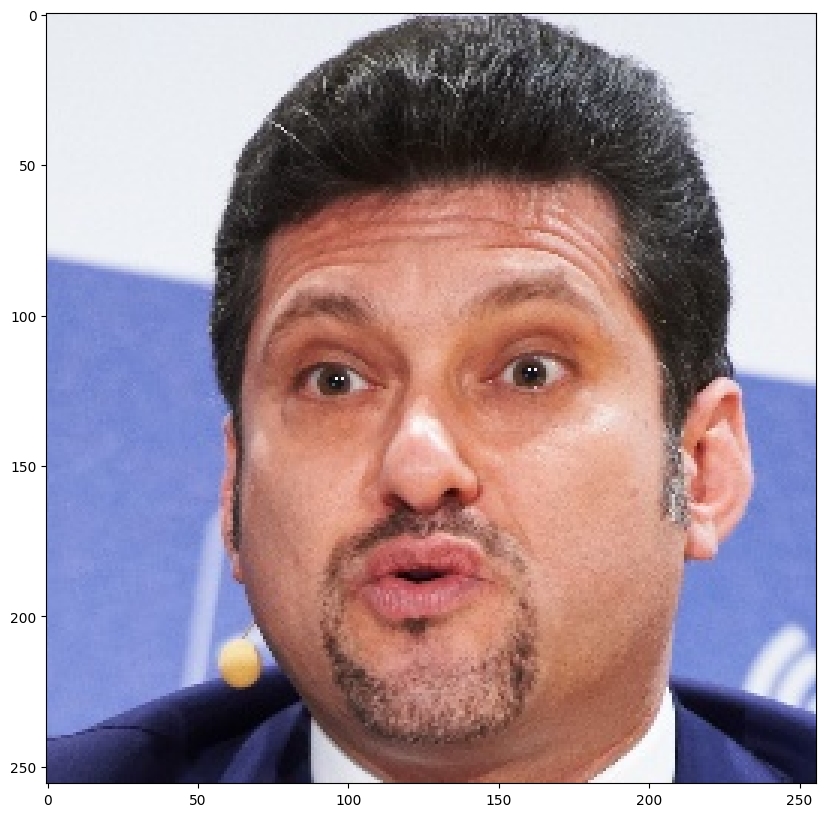

In [7]:
plt.figure(figsize = (14,10))
plt.imshow(plt.imread("/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test/real/"+pd.Series(realtest).astype(str)[123]))

In [8]:
realtestimg = "/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test/real/"+pd.Series(realtest).astype(str)
faketestimg = "/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test/fake/"+pd.Series(faketest).astype(str)
realtrainimg = "/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/train/real/"+pd.Series(realtrain).astype(str)
faketrainimg = "/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/train/fake/"+pd.Series(faketrain).astype(str)
realvalimg = "/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/valid/real/"+pd.Series(realval).astype(str)
fakevalimg = "/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/valid/fake/"+pd.Series(fakeval).astype(str)


In [9]:
series_images = pd.concat([realtestimg,faketestimg,realtrainimg,faketrainimg,realvalimg,fakevalimg])

In [10]:
series_images.shape

(140000,)

In [11]:
list_of_types = [np.repeat('real',len(realtest)),
np.repeat('fake',len(faketest)),
np.repeat('real',len(realtrain)),
np.repeat('fake',len(faketrain)),
np.repeat('real',len(realval)),
np.repeat('fake',len(fakeval))]


list_of_segmentation = [np.repeat('test',len(realtest)),
np.repeat('test',len(faketest)),
np.repeat('train',len(realtrain)),
np.repeat('train',len(faketrain)),
np.repeat('valid',len(realval)),
np.repeat('valid',len(fakeval))]

In [12]:
np.concatenate(list_of_types, axis=0).shape

(140000,)

In [13]:
list_of_typescon = np.concatenate(list_of_types, axis=0)
list_of_segmentationcon = np.concatenate(list_of_segmentation, axis=0)
list_of_segmentationcon

array(['test', 'test', 'test', ..., 'valid', 'valid', 'valid'],
      dtype='<U5')

In [14]:
df_imagesdfake = pd.DataFrame({'image_path':series_images,'img_status':list_of_typescon.tolist(),'where':list_of_segmentationcon.tolist()})
df_imagesdfake.shape

(140000, 3)

In [15]:
df_imagesdfake.head(4)

,image_path,img_status,where
0,/kaggle/input/140k-real-and-fake-faces/real_vs...,real,test
1,/kaggle/input/140k-real-and-fake-faces/real_vs...,real,test
2,/kaggle/input/140k-real-and-fake-faces/real_vs...,real,test
3,/kaggle/input/140k-real-and-fake-faces/real_vs...,real,test
